In [ ]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

RFC_METRIC = 'gini'  #metric used for RandomForrestClassifier
NUM_ESTIMATORS = 100 #number of estimators used for RandomForrestClassifier
NO_JOBS = 4 #number of parallel jobs used for RandomForrestClassifier

#TRAIN/VALIDATION/TEST SPLIT
#VALIDATION
VALID_SIZE = 0.20 # simple validation using train_test_split
TEST_SIZE = 0.20 # test size using_train_test_split

#CROSS-VALIDATION
NUMBER_KFOLDS = 5 #number of KFolds for cross-validation

RANDOM_STATE = 2018

MAX_ROUNDS = 1000 #lgb iterations
EARLY_STOP = 50 #lgb early stop 
OPT_ROUNDS = 1000  #To be adjusted based on best validation rounds
VERBOSE_EVAL = 50 #Print out metric result

IS_LOCAL = False

In [20]:
df = pd.read_csv("C:/Users/DrdrA/OneDrive/Desktop/IA_Practice/creditcard.csv")
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


In [12]:
print("Number of  rows:",len(df), "\nNumber of columns:", df.shape[1])

Number of  rows: 284807 
Number of columns: 31


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [18]:
df.describe()
#data containis 284,807 transactions in 2 consective days

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [17]:
df['Class'].unique()

array([0, 1], dtype=int64)

In [ ]:
#check  missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent']).transpose()
#there is none

,Time,V16,Amount,V28,V27,V26,V25,V24,V23,V22,...,V10,V9,V8,V7,V6,V5,V4,V3,V2,Class
Total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Percent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Class
0    284315
1       492
Name: count, dtype: int64


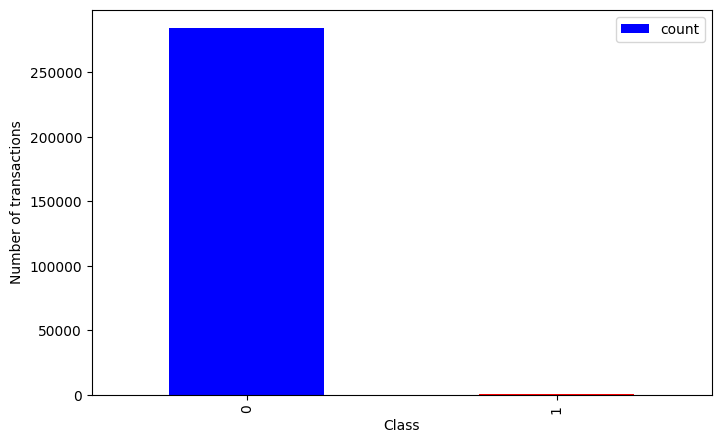

In [53]:
#check unbalanced data
print(df['Class'].value_counts())
df['Class'].value_counts().plot(kind="bar", color=["blue", "red"], figsize=(8, 5))
plt.ylabel("Number of transactions")
plt.xlabel("Class")
plt.legend()
plt.show()
#Imbalanced data: Only 492 (or 0.172%) of transaction are fraudulent.

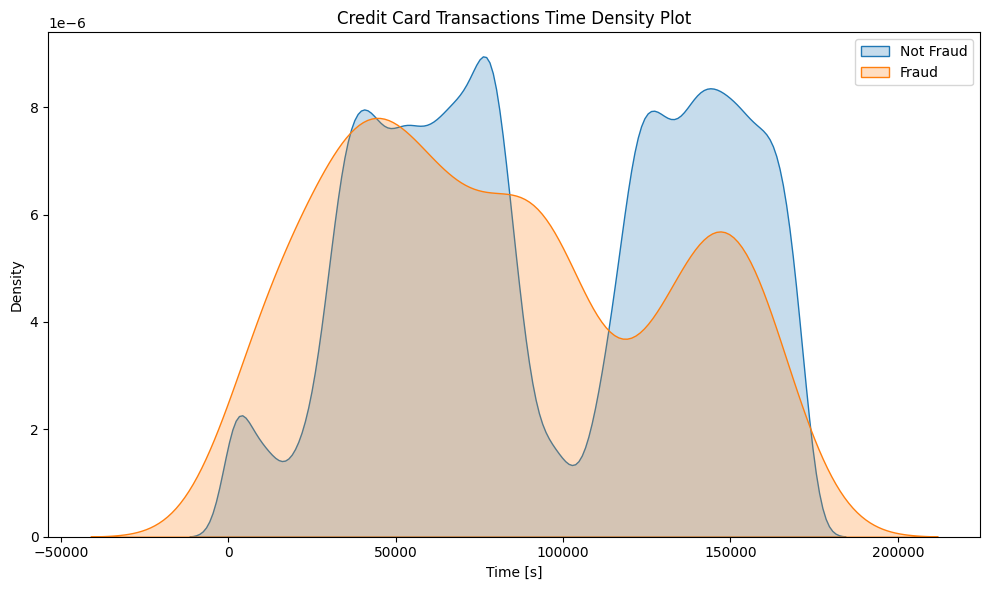

In [ ]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df[df['Class'] == 0]['Time'], label='Not Fraud', fill=True)
sns.kdeplot(df[df['Class'] == 1]['Time'], label='Fraud', fill=True)

plt.title('Credit Card Transactions Time Density Plot')
plt.xlabel('Time [s]')
plt.ylabel('Density')
plt.legend()

plt.tight_layout()
plt.show()
#Fraudulent transactions have a wider distribution than valid transactions 
# they are equaly distributed in time, including the low real transaction times, during night in Europe timezone.

In [76]:
df['Hour'] = df['Time'].apply(lambda x: np.floor(x / 3600))
tmp = df.groupby(['Hour', 'Class'])['Amount'].aggregate(['min', 'max', 'count', 'sum', 'mean', 'median', 'var']).reset_index()
tmp_df = pd.DataFrame(tmp)
tmp_df.head()#counts the min, max,,,, for each class (0,1) during each hour

,Hour,Class,min,max,count,sum,mean,median,var
0,0.0,0,0.0,7712.43,3961,256572.87,64.774772,12.990,45615.821201
1,0.0,1,0.0,529.00,2,529.00,264.500000,264.500,139920.500000
2,1.0,0,0.0,1769.69,2215,145806.76,65.826980,22.820,20053.615770
3,1.0,1,59.0,239.93,2,298.93,149.465000,149.465,16367.832450
4,2.0,0,0.0,4002.88,1555,106989.39,68.803466,17.900,45355.430437


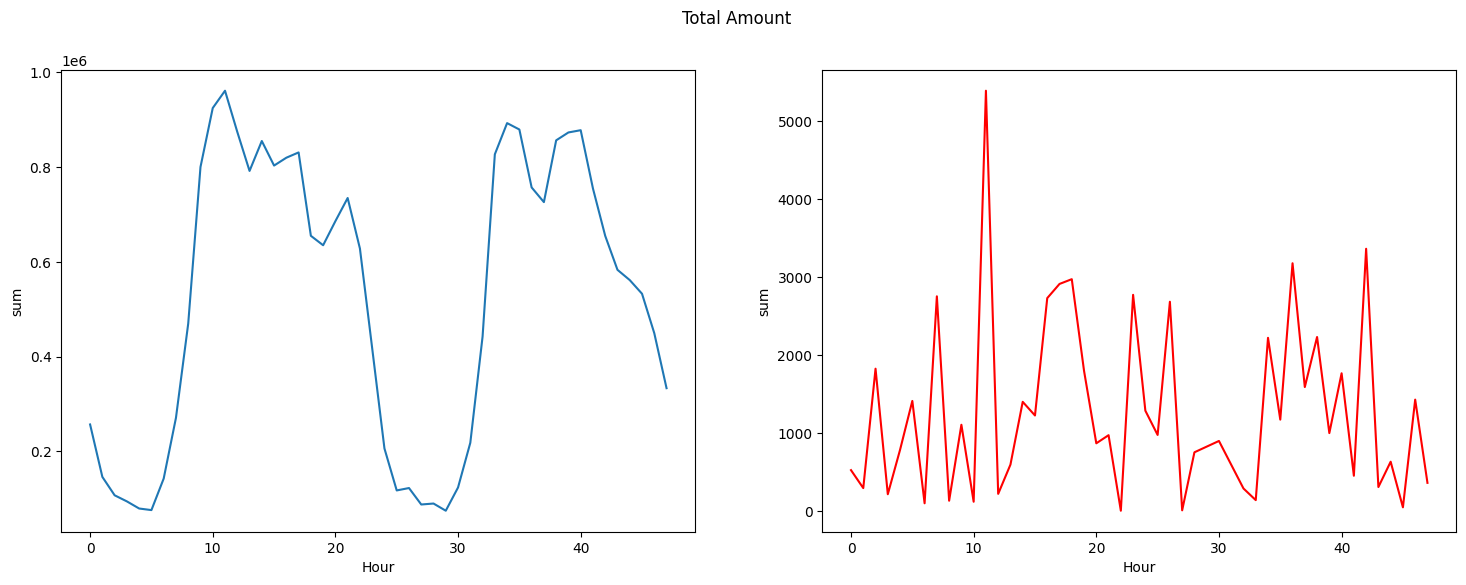

In [75]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="sum", data=tmp_df.loc[tmp_df.Class==0]) #for non fraud
s = sns.lineplot(ax = ax2, x="Hour", y="sum", data=tmp_df.loc[tmp_df.Class==1], color="red")  #for fraud
plt.suptitle("Total Amount")
plt.show();

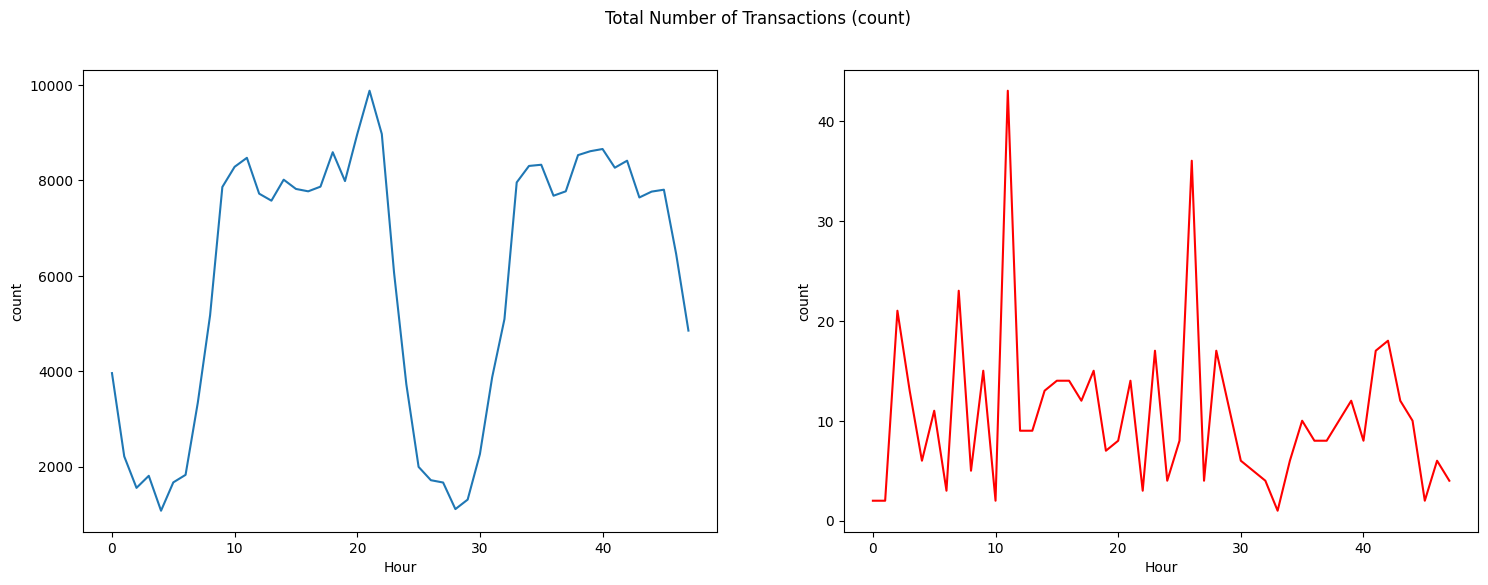

In [80]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="count", data=tmp_df.loc[tmp_df.Class==0]) #for non fraud
s = sns.lineplot(ax = ax2, x="Hour", y="count", data=tmp_df.loc[tmp_df.Class==1], color="red")  #for fraud
plt.suptitle("Total Number of Transactions (count)")
plt.show();

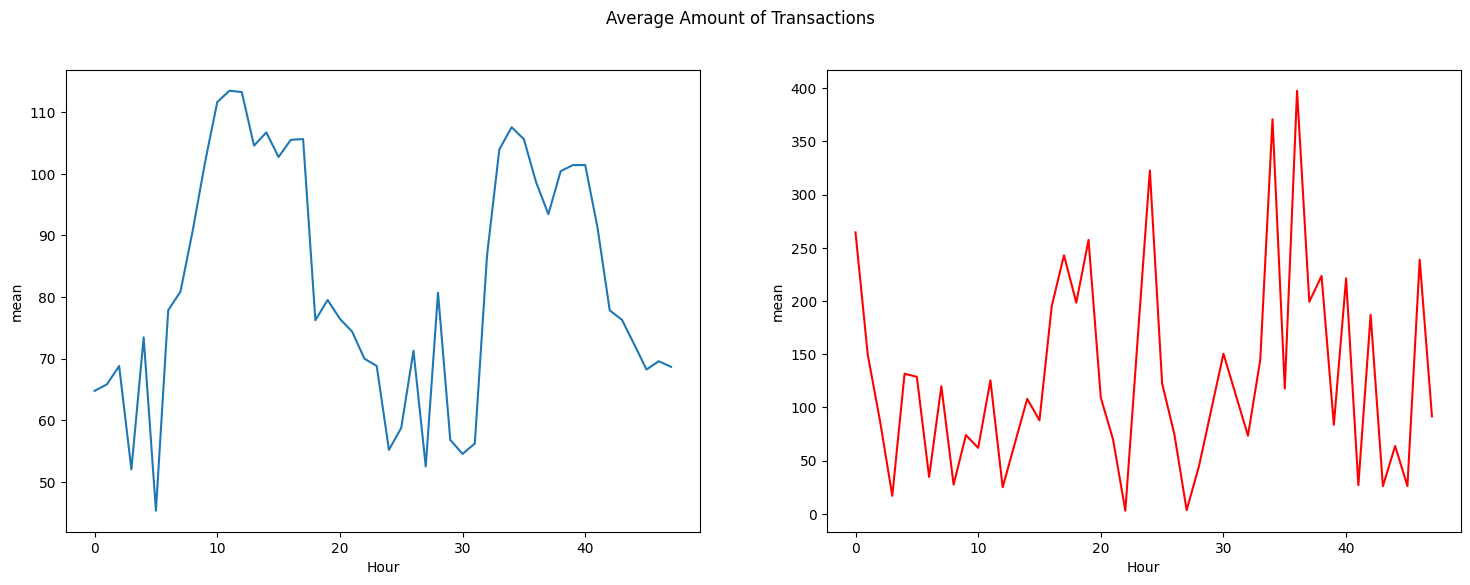

In [81]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="mean", data=tmp_df.loc[tmp_df.Class==0]) #for non fraud
s = sns.lineplot(ax = ax2, x="Hour", y="mean", data=tmp_df.loc[tmp_df.Class==1], color="red")  #for fraud
plt.suptitle("Average Amount of Transactions")
plt.show();

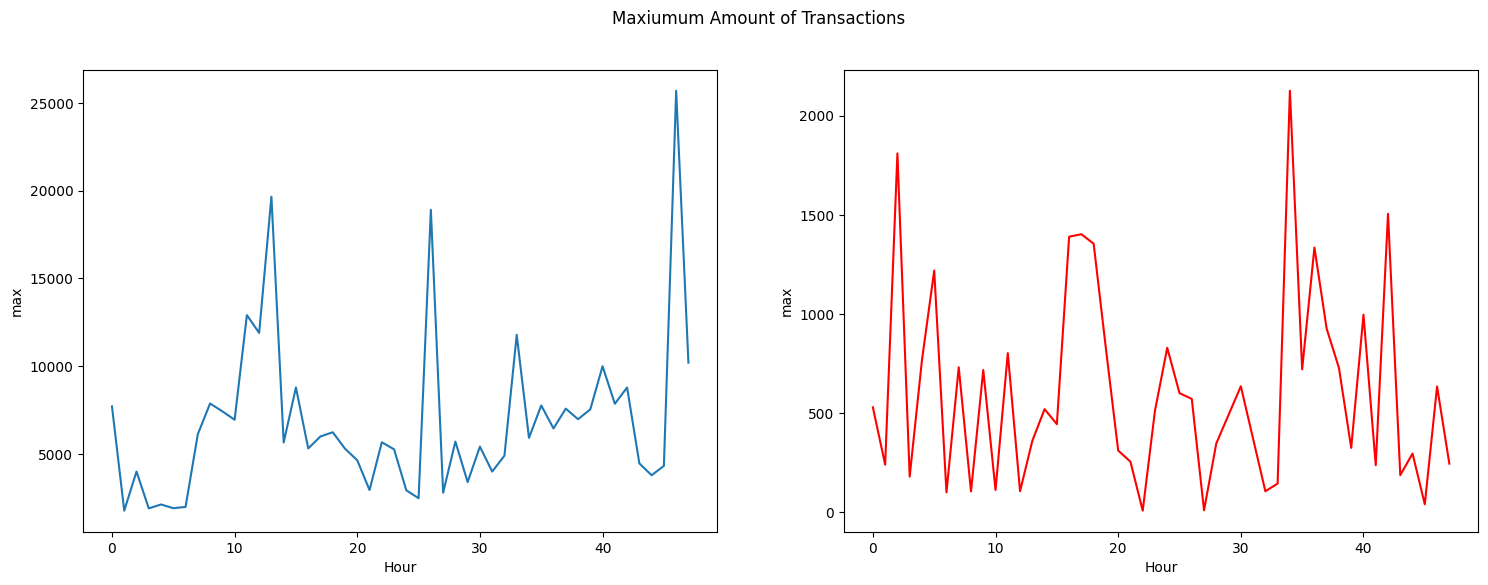

In [83]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="max", data=tmp_df.loc[tmp_df.Class==0]) #for non fraud
s = sns.lineplot(ax = ax2, x="Hour", y="max", data=tmp_df.loc[tmp_df.Class==1], color="red")  #for fraud
plt.suptitle("Maxiumum Amount of Transactions")
plt.show();

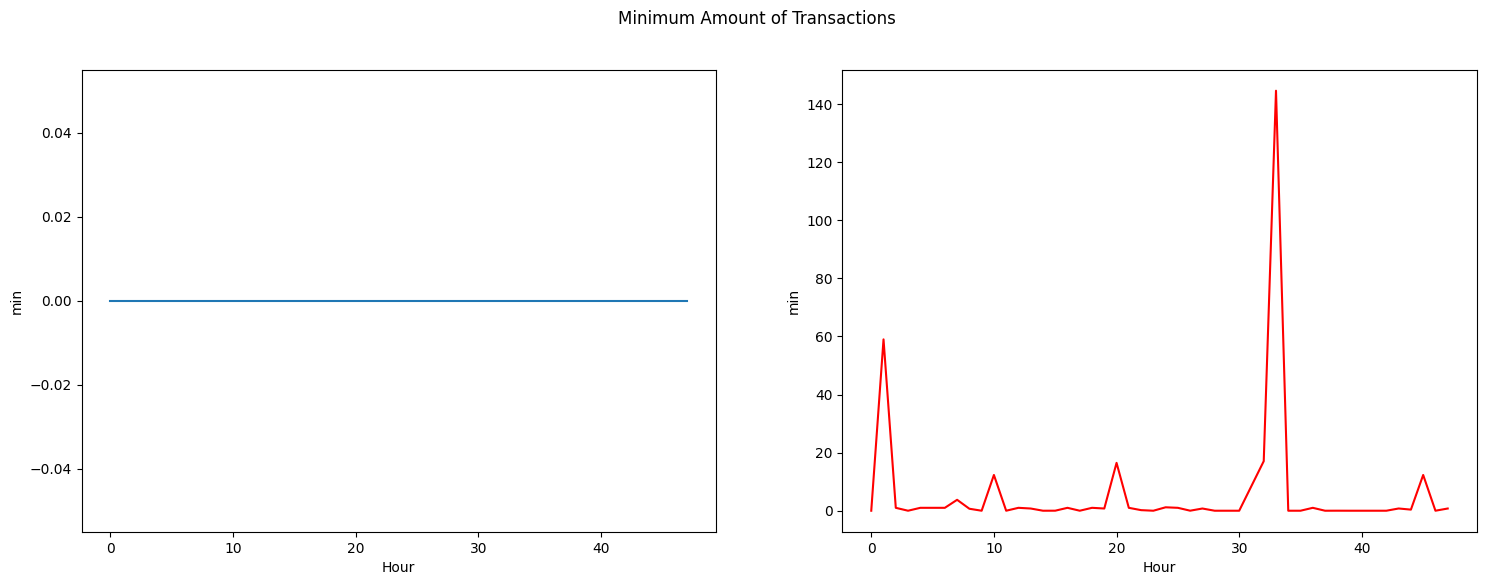

In [ ]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="min", data=tmp_df.loc[tmp_df.Class==0]) #for non fraud
s = sns.lineplot(ax = ax2, x="Hour", y="min", data=tmp_df.loc[tmp_df.Class==1], color="red")  #for fraud
plt.suptitle("Minimum Amount of Transactions")
plt.show();

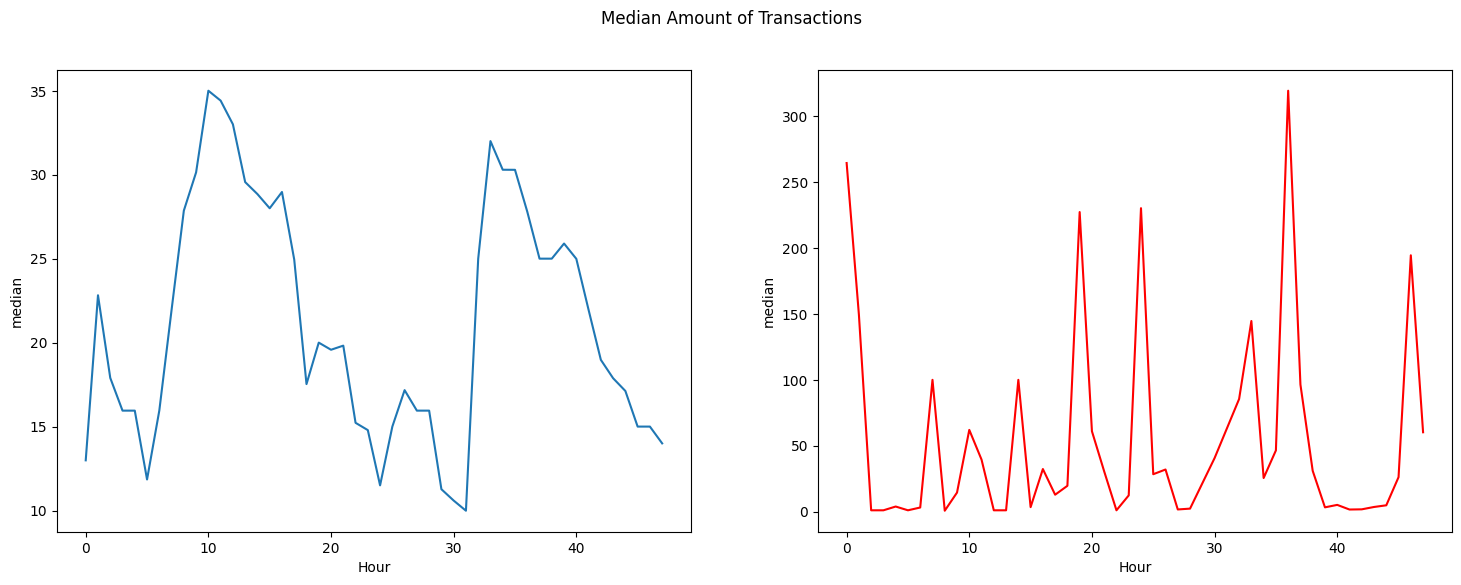

In [84]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,6))
s = sns.lineplot(ax = ax1, x="Hour", y="median", data=tmp_df.loc[tmp_df.Class==0]) #for non fraud
s = sns.lineplot(ax = ax2, x="Hour", y="median", data=tmp_df.loc[tmp_df.Class==1], color="red")  #for fraud
plt.suptitle("Median Amount of Transactions")
plt.show();

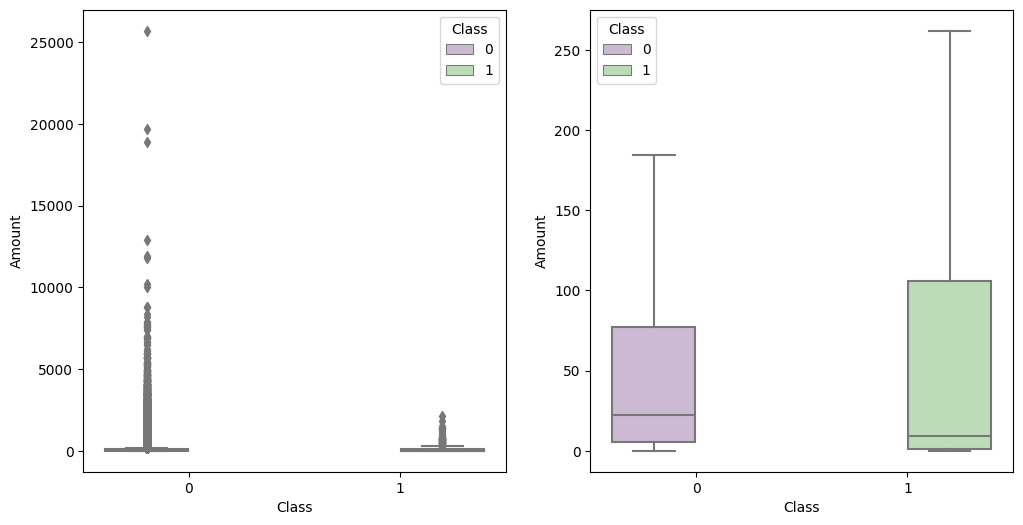

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,6))
s = sns.boxplot(ax = ax1, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=True)
s = sns.boxplot(ax = ax2, x="Class", y="Amount", hue="Class",data=df, palette="PRGn",showfliers=False)
plt.show();

In [93]:
t = df[['Amount','Class']].copy()
class_0 = t.loc[t['Class'] == 0]['Amount']
class_1 = t.loc[t['Class'] == 1]['Amount']
class_0.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [92]:
class_1.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [ ]:
#the real transactions have a smaller mean, std, Q2, Q3, higher Q1 and max value and large outliers

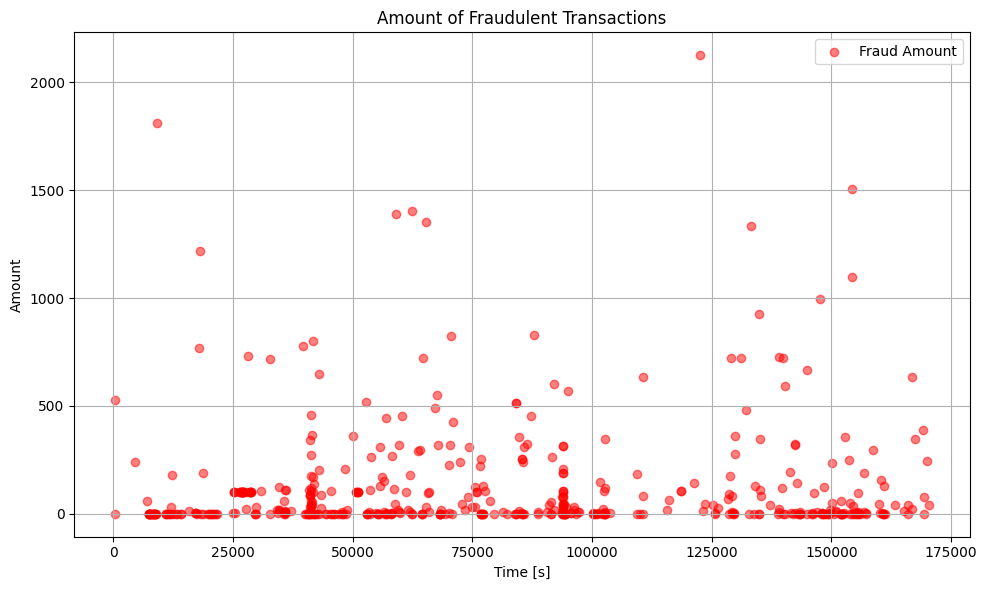

In [ ]:
#Plotting fraudlent transactions against time (total 48h)
fraud = df.loc[df['Class'] == 1]
plt.figure(figsize=(10, 6))
plt.scatter(fraud['Time'], fraud['Amount'], c='red', alpha=0.5,  label='Fraud Amount')
plt.title('Amount of Fraudulent Transactions')
plt.xlabel('Time [s]')
plt.ylabel('Amount')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


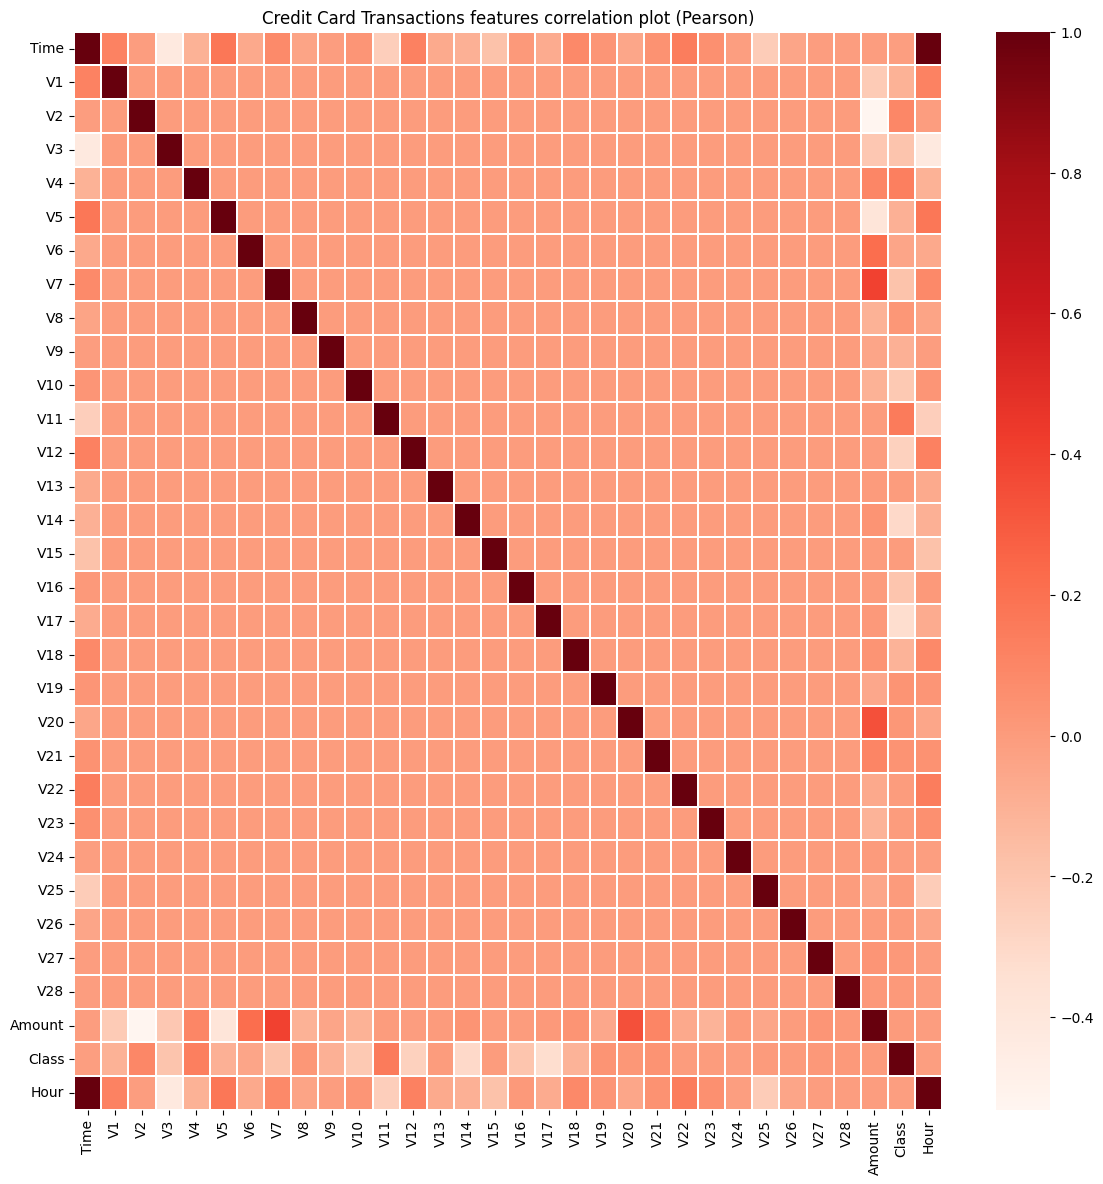

In [98]:
#Features correlation
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

In [ ]:
#there is no notable correlation between features V1-V28. 
#There are certain correlations between some of these features and Time (inverse correlation with V3) 
#and Amount (direct correlation with V7 and V20, inverse correlation with V2 and V5).

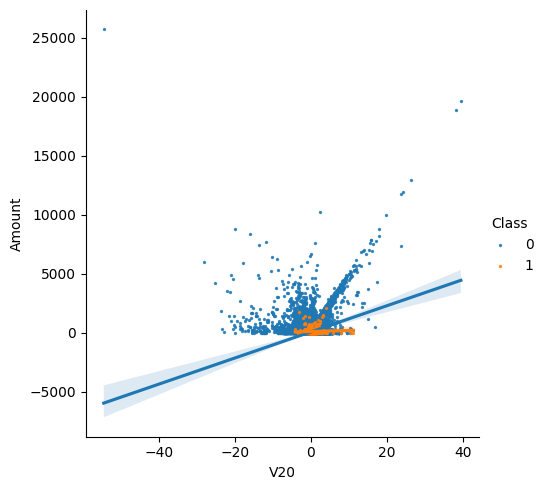

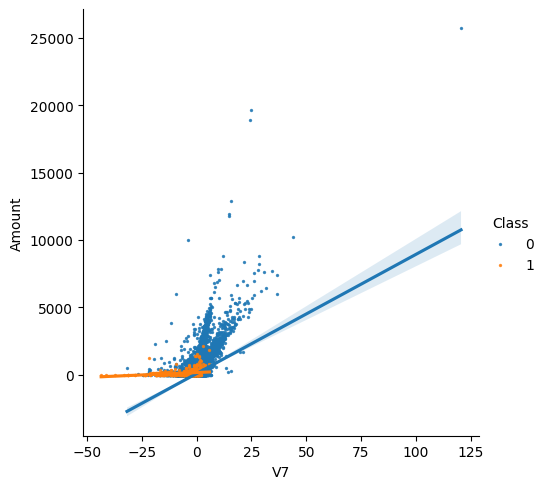

In [101]:
#plot correlated values {V20;Amount} and {V7;Amount}.
s = sns.lmplot(x='V20', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V7', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

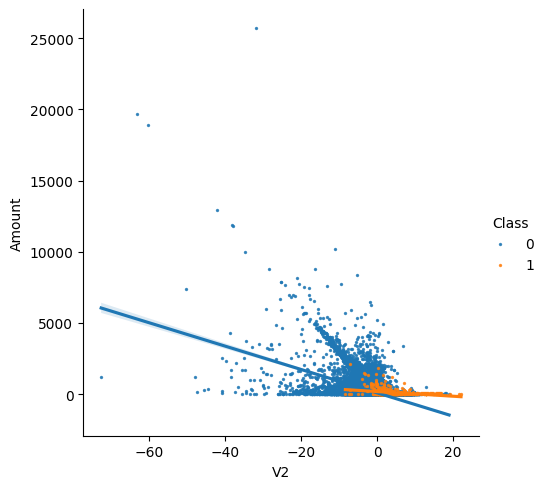

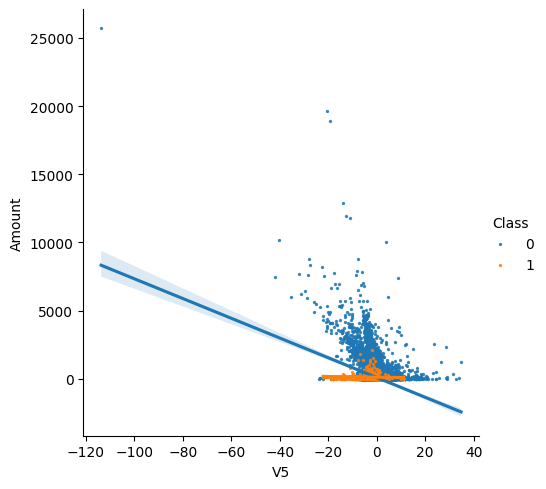

In [102]:
#plot inverse correlated values {V20;Amount} and {V7;Amount}.
s = sns.lmplot(x='V2', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
s = sns.lmplot(x='V5', y='Amount',data=df, hue='Class', fit_reg=True,scatter_kws={'s':2})
plt.show()

<Figure size 640x480 with 0 Axes>

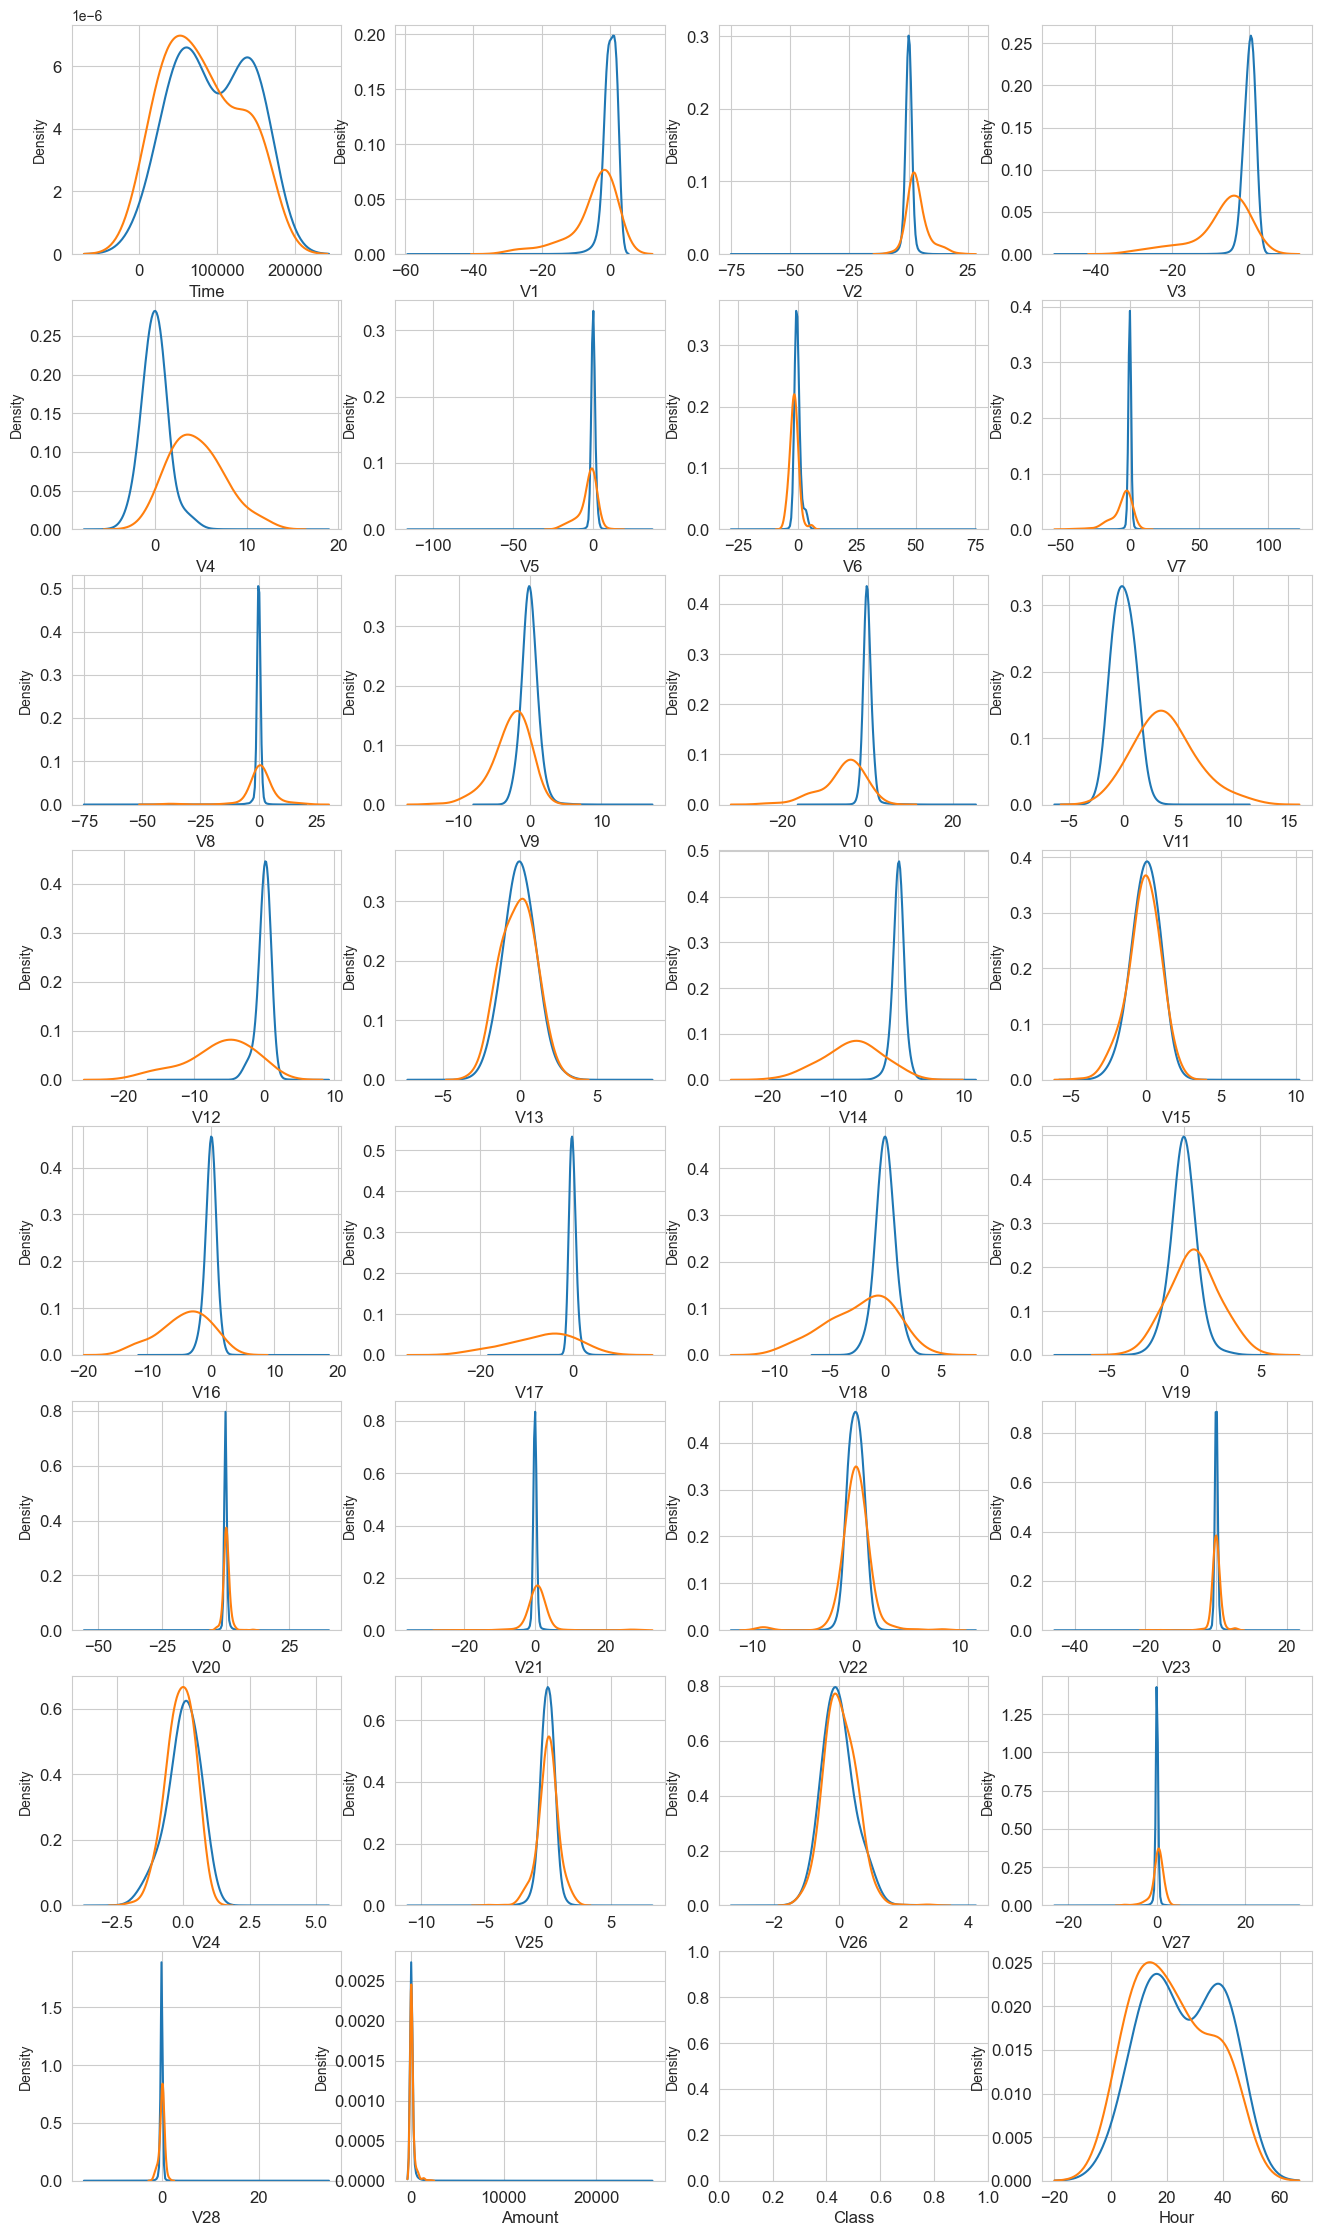

In [109]:
#Features density plot
val = df.columns.values

i = 0
nofraud = df.loc[df['Class'] == 0]
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in val:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(nofraud[feature], bw=0.5,label="Class = 0")
    sns.kdeplot(fraud[feature], bw=0.5,label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

In [ ]:
#Class: V4, V11 have clearly separated distributions for Class values 0 and 1,
# V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile,
# V25, V26, V28 have similar profiles for the two values of Class.

In [110]:
#Predictive Models
target_variable = 'Class'
predictors_variables = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']
#splitting dataset to: train, test, valid
train_df, test_df = train_test_split(df, test_size=TEST_SIZE, random_state=RANDOM_STATE, shuffle=True)
train_df, valid_df = train_test_split(train_df, test_size=VALID_SIZE, random_state=RANDOM_STATE, shuffle=True)

In [112]:
#RandomForestClassifier
rfc_model = RandomForestClassifier(n_jobs=NO_JOBS, 
                             random_state=RANDOM_STATE,
                             criterion=RFC_METRIC,
                             n_estimators=NUM_ESTIMATORS,
                             verbose=False)
rfc_model.fit(train_df[predictors_variables], train_df[target_variable].values)

RandomForestClassifier(n_jobs=4, random_state=2018, verbose=False)

In [113]:
preds = rfc_model.predict(valid_df[predictors_variables])

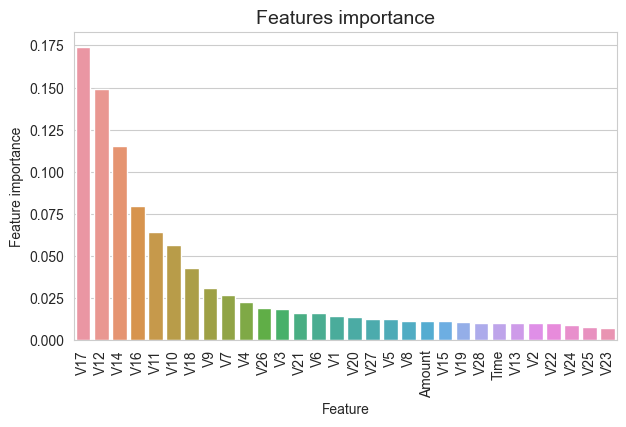

In [114]:
#Visualizing feautures importance
ttt = pd.DataFrame({'Feature': predictors_variables, 'Feature importance': rfc_model.feature_importances_})
ttt = ttt.sort_values(by='Feature importance',ascending=False)
plt.figure(figsize = (7,4))
plt.title('Features importance',fontsize=14)
s = sns.barplot(x='Feature',y='Feature importance',data=ttt)
s.set_xticklabels(s.get_xticklabels(),rotation=90)
plt.show() 

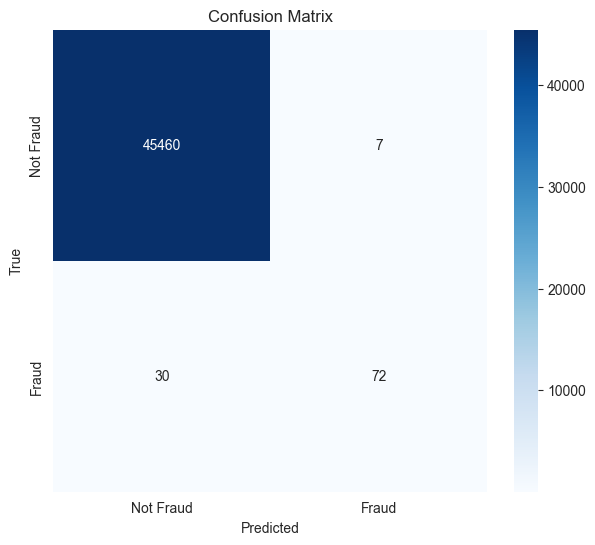

In [116]:
confusion_matrix = pd.crosstab(valid_df[target_variable].values, preds, rownames=['Actual'], colnames=['Predicted'])
plt.figure(figsize=(7, 6))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Fraud', 'Fraud'], 
            yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [118]:
roc_auc_score(valid_df[target_variable].values, preds)

0.8528641975628091

In [119]:
#with XGBoost (a gradient boosting algorithm)

# Prepare the train and valid datasets
new_train = xgb.DMatrix(train_df[predictors_variables], train_df[target_variable].values)
new_valid = xgb.DMatrix(valid_df[predictors_variables], valid_df[target_variable].values)
new_test = xgb.DMatrix(test_df[predictors_variables], test_df[target_variable].values)

watchlist = [(new_train, 'train'), (new_valid, 'valid')]

# Set xgboost parameters
params = {}
params['objective'] = 'binary:logistic'
params['eta'] = 0.039
params['silent'] = True
params['max_depth'] = 2
params['subsample'] = 0.8
params['colsample_bytree'] = 0.9
params['eval_metric'] = 'auc'
params['random_state'] = RANDOM_STATE

In [122]:
#train  model
xgb_model = xgb.train(params, 
                new_train, 
                MAX_ROUNDS, 
                watchlist, 
                early_stopping_rounds=EARLY_STOP, 
                maximize=True, 
                verbose_eval=VERBOSE_EVAL)

[0]	train-auc:0.94070	valid-auc:0.88630
[50]	train-auc:0.94200	valid-auc:0.89009
[100]	train-auc:0.97584	valid-auc:0.96685
[150]	train-auc:0.98525	valid-auc:0.97960
[200]	train-auc:0.99279	valid-auc:0.98495
[250]	train-auc:0.99493	valid-auc:0.98352
[257]	train-auc:0.99511	valid-auc:0.98382


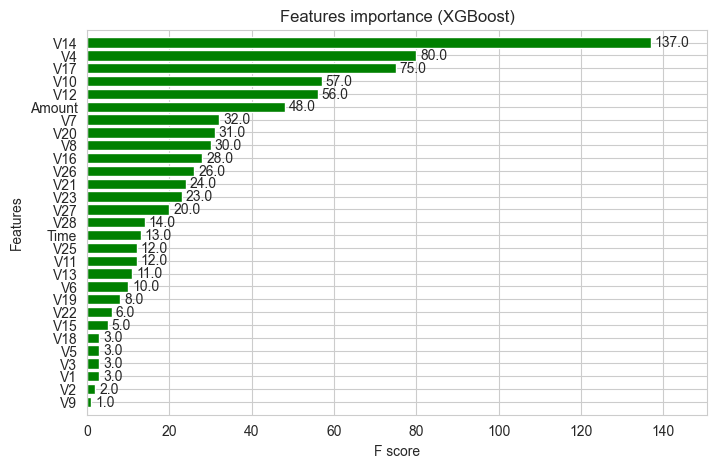

In [123]:
fig, (ax) = plt.subplots(ncols=1, figsize=(8,5))
xgb.plot_importance(xgb_model, height=0.8, title="Features importance (XGBoost)", ax=ax, color="green") 
plt.show()

In [124]:
preds = xgb_model.predict(new_test)

In [126]:
roc_auc_score(test_df[target_variable].values, preds)

0.9803156765502444